# Run Processor (notebook version)

This notebook reproduces the behavior of `run_processor_v2.py`: it sets up the project path, loads the preprocessing configuration, instantiates `DataPreprocessor`, and runs the processing pipeline. Run the cells in order.

In [1]:
# Imports and project root setup
import sys
import yaml
from pathlib import Path
import matplotlib.pyplot as plt

# Configure matplotlib for non-transparent saved figures
plt.rcParams.update({
    'savefig.facecolor': 'white',
    'savefig.transparent': False,
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'axes.edgecolor': 'black',
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'text.color': 'black',
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.1
})

# Determine project root: prefer __file__ when available (script), otherwise search upward for 'config/preprocessing.yaml'
def find_project_root(start_path: Path = Path.cwd()):
    p = start_path.resolve()
    for parent in [p] + list(p.parents):
        if (parent / 'config' / 'preprocessing.yaml').exists():
            return parent
    return start_path.resolve()

try:
    project_root = Path(__file__).resolve().parent.parent
except NameError:
    project_root = find_project_root()

if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

# (Optional) configure matplotlib interactive backend, if you want interactive selectors in this notebook
# Uncomment one of the following depending on your environment:
# %matplotlib widget
# %matplotlib notebook
%matplotlib inline

# Import the DataPreprocessor class from the package
from processing.data_preprocessor_v2 import DataPreprocessor

In [2]:
# Load configuration and create the DataPreprocessor instance
config_path = project_root / 'config' / 'preprocessing.yaml'
with open(config_path) as f:
    config = yaml.safe_load(f)

dp = DataPreprocessor(config)


Using Linux data directory: /data/grki4829/CoBaLT
Measurement time (behind 1 hour): 2025-12-02 22:11:29

Preprocessed data file(s) found. No need to create new one(s)...
Locating and loading relevant netcdf data chunks...

Including chunk #0: 0.00–33.10s overlaps 0.00–390.00s
File loaded.

Including chunk #1: 33.10–72.66s overlaps 0.00–390.00s
File loaded.

Including chunk #2: 72.66–112.60s overlaps 0.00–390.00s
File loaded.

Including chunk #3: 112.60–152.88s overlaps 0.00–390.00s
File loaded.

Including chunk #4: 152.88–193.59s overlaps 0.00–390.00s
File loaded.

Including chunk #5: 193.59–234.39s overlaps 0.00–390.00s
File loaded.

Including chunk #6: 234.39–275.05s overlaps 0.00–390.00s
File loaded.

Including chunk #7: 275.05–316.42s overlaps 0.00–390.00s
File loaded.

Including chunk #8: 316.42–357.84s overlaps 0.00–390.00s
File loaded.

Including chunk #9: 357.84–879.81s overlaps 0.00–390.00s
File loaded.

✅ Full time range 0.00–390.00s covered by loaded chunks.
Loaded 10 files


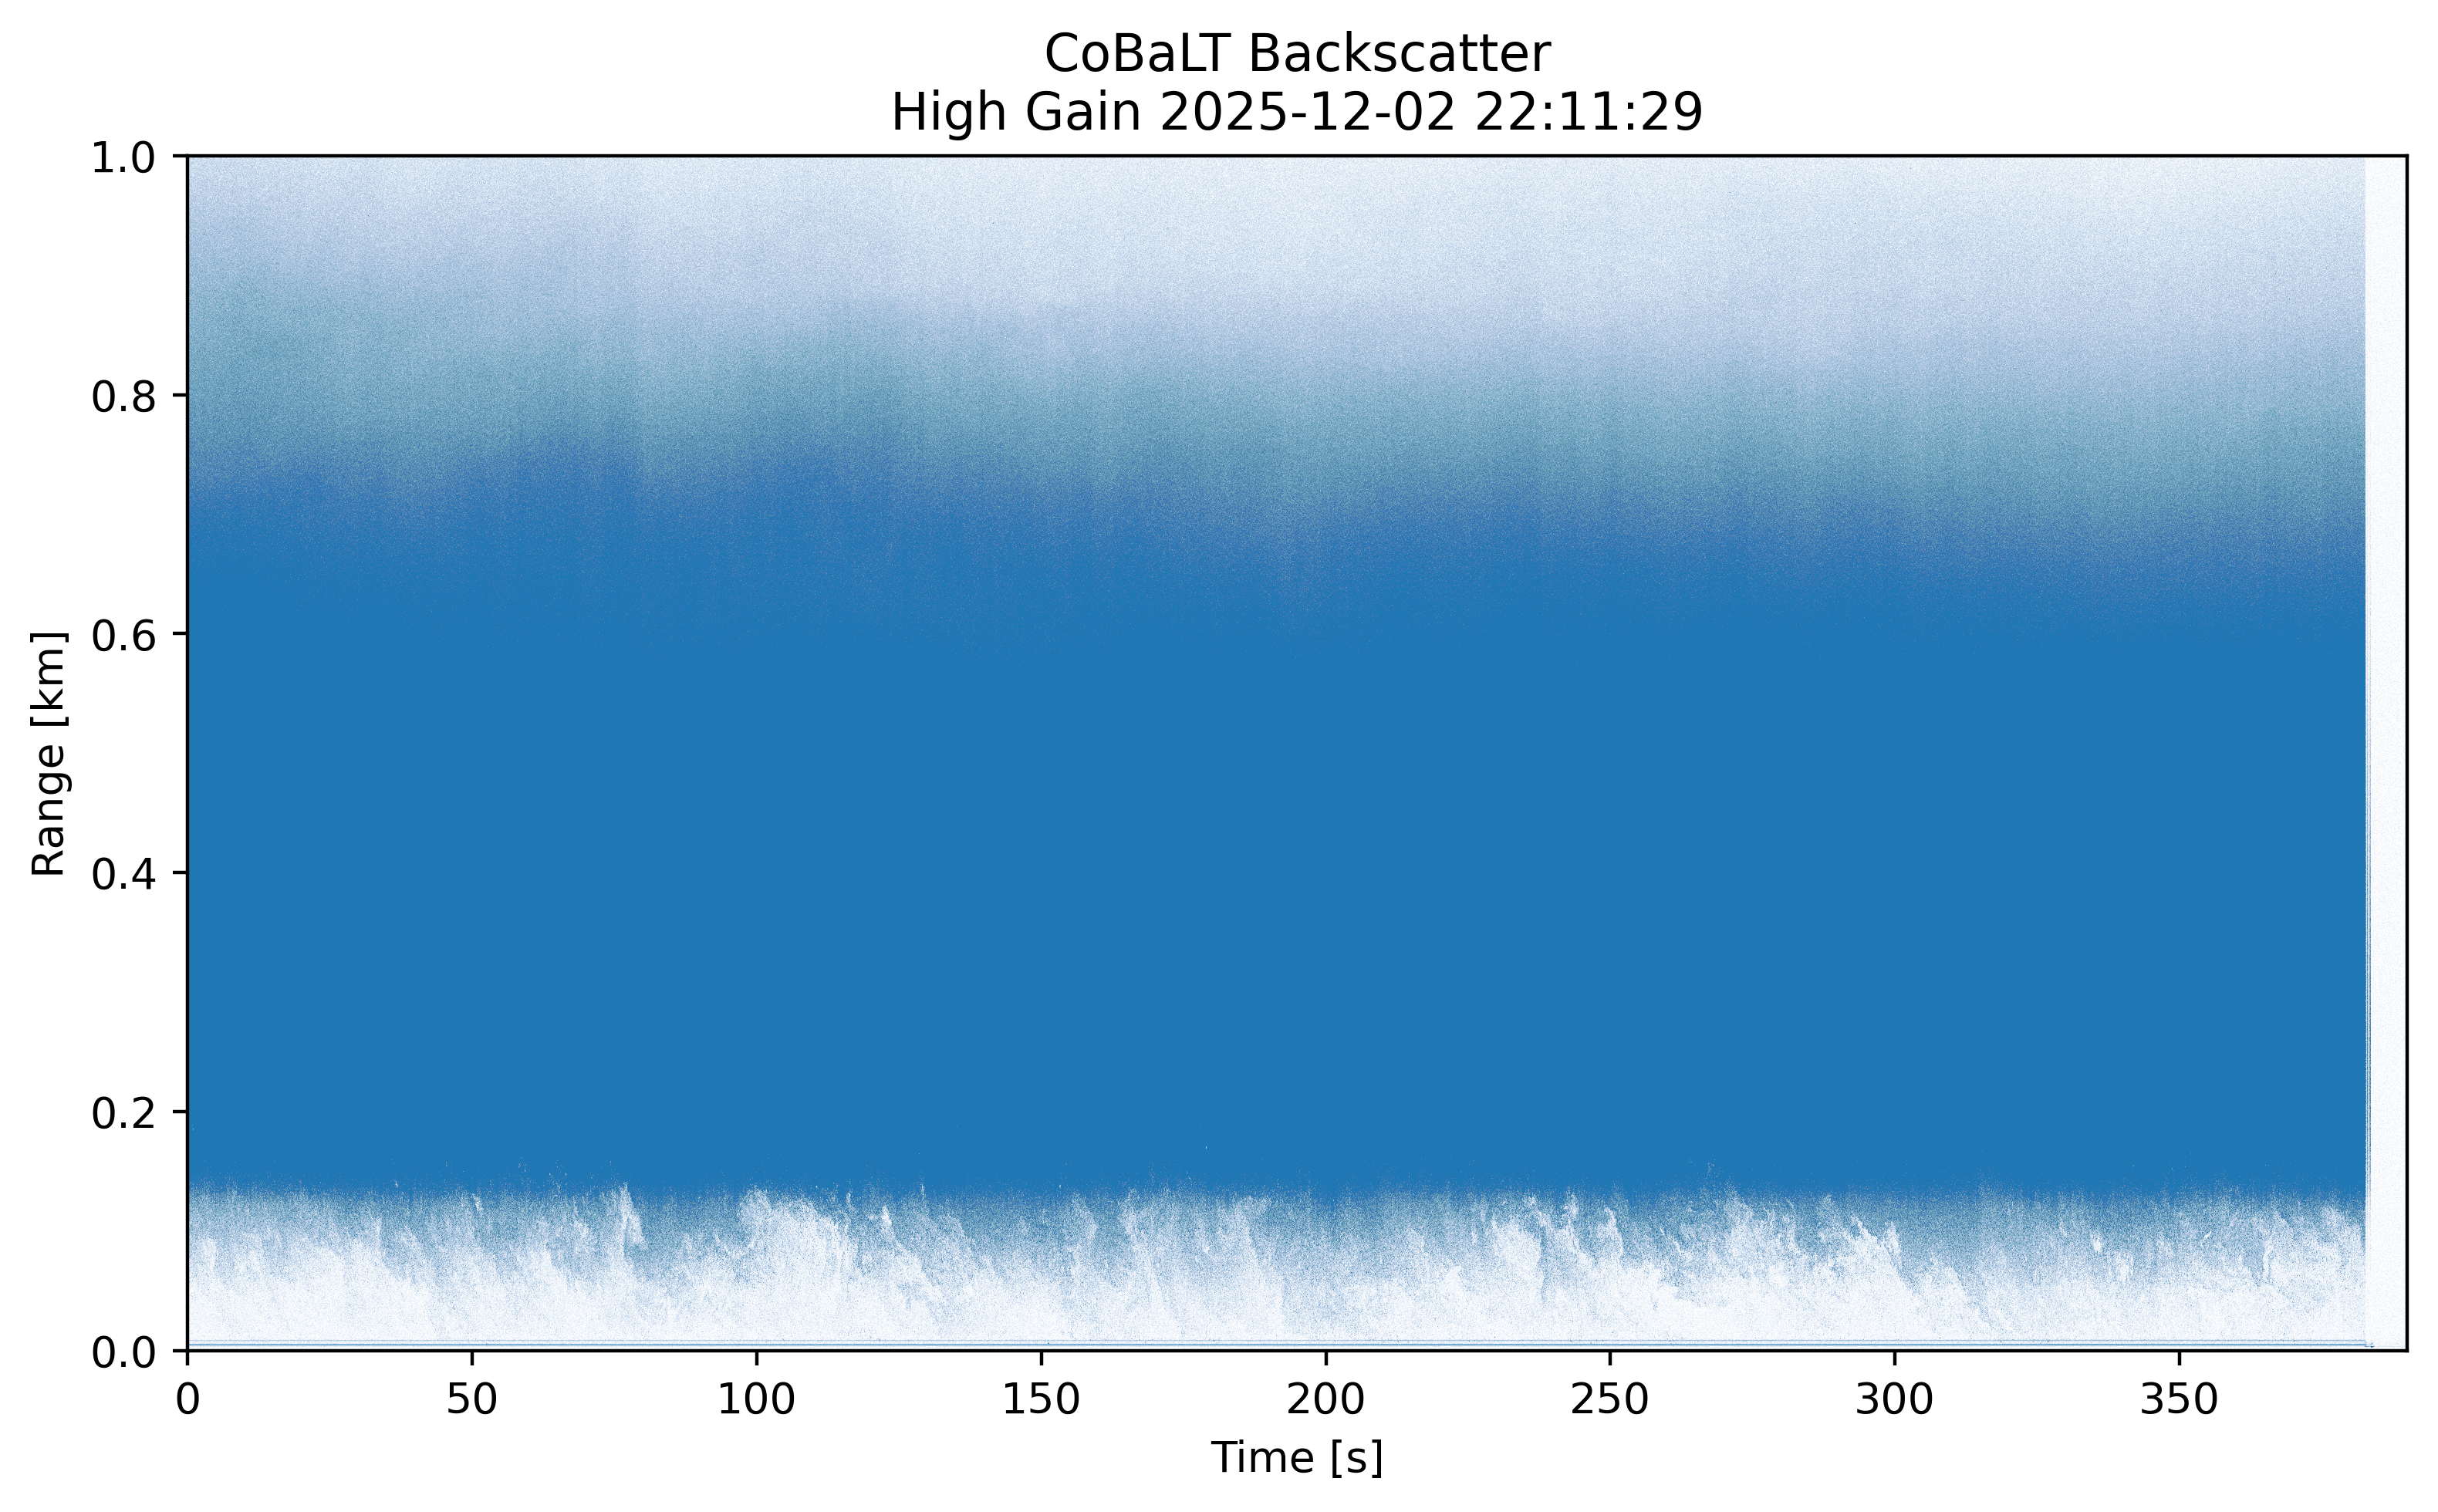

In [3]:
# Run the processing pipeline
# Note: this may open plots (depending on the config). Run this cell when you're ready.
dp.run()
